 predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

import data

In [70]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
ss = pd.read_csv("sample_submission.csv")


In [71]:
ss.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [72]:
train_df.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4240,4509_03,Mars,False,D/144/S,TRAPPIST-1e,13.0,False,27.0,0.0,3246.0,0.0,0.0,Ecco Sopie,True
354,0388_01,Earth,True,G/57/S,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Fanna Sullones,False
265,0290_02,Europa,True,B/7/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Algor Excialing,True
7047,7504_01,Earth,False,F/1552/P,TRAPPIST-1e,30.0,False,0.0,2.0,0.0,690.0,86.0,NaN,False
4181,4463_02,Europa,True,B/145/P,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Ionium Boltund,True
3965,4230_01,Earth,False,F/873/P,TRAPPIST-1e,21.0,False,0.0,0.0,23.0,820.0,22.0,Shaele Wilkinner,False
803,0849_01,Europa,False,B/32/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Cellum Oidederval,True
3068,3311_01,Europa,False,E/221/S,TRAPPIST-1e,26.0,False,0.0,1638.0,0.0,476.0,226.0,Neutrin Alenter,False
351,0384_02,Earth,False,G/56/S,TRAPPIST-1e,14.0,False,3.0,0.0,881.0,25.0,0.0,Ellard Simpsonks,True
6255,6622_01,Earth,False,G/1070/P,55 Cancri e,54.0,False,752.0,0.0,44.0,14.0,0.0,Coreen Lynnerett,False


Data exploration

In [73]:
train_df.shape

(8693, 14)

In [74]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [75]:
train_df['Transported'].unique()

array([False,  True])

In [76]:
# look for null values
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [77]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [78]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [79]:
# deal with missing values
from sklearn.impute import SimpleImputer
imp_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "RoomService"]

imp = SimpleImputer(strategy= "mean")
imp.fit(train_df[imp_cols])
train_df[imp_cols] = imp.transform(train_df[imp_cols])
test_df[imp_cols] = imp.transform(test_df[imp_cols])




In [80]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [81]:
print(train_df.shape)
print(test_df.shape)

(8693, 14)
(4277, 13)


In [82]:
# drop remaining na values
train_df1 = train_df.dropna()
test_df1 = test_df.dropna()

In [83]:
train_df1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [84]:
test_df1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [85]:
print(train_df.shape)
print(test_df.shape)

print(train_df1.shape)
print(test_df1.shape)

(8693, 14)
(4277, 13)
(7559, 14)
(3747, 13)


null values dealt with

In [86]:
train_df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Some Data Visualization

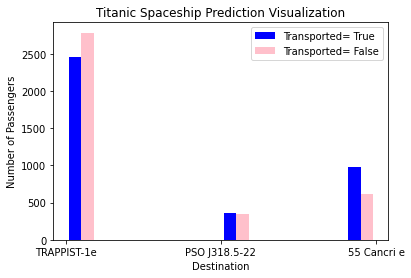

In [87]:
# see passengers who were transported and if they destination
transported = train_df1[train_df1.Transported == True].Destination
not_transported = train_df1[train_df1.Transported == False].Destination


from matplotlib import pyplot as plt

# visualization using histogram for Destination vs Transported
plt.xlabel("Destination")
plt.ylabel("Number of Passengers")
plt.title("Titanic Spaceship Prediction Visualization")
plt.hist([transported, not_transported], color= ["blue", "pink"], label= ["Transported= True", "Transported= False"])
plt.legend()

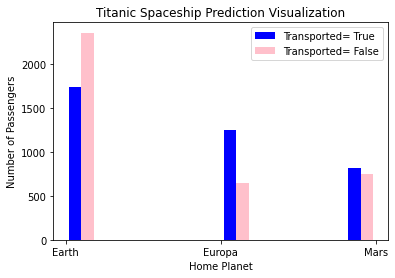

In [88]:
# see passengers who were transported and if they home planet
transported1 = train_df1[train_df1.Transported == True].HomePlanet
not_transported1 = train_df1[train_df1.Transported == False].HomePlanet


from matplotlib import pyplot as plt

# visualization using histogram for Destination vs Transported
plt.xlabel("Home Planet")
plt.ylabel("Number of Passengers")
plt.title("Titanic Spaceship Prediction Visualization")
plt.hist([transported1, not_transported1], color= ["blue", "pink"], label= ["Transported= True", "Transported= False"])
plt.legend()

Label Encoding


In [89]:
# print columns with dtypes object# create a function for doing the above
def print_unique(df):
  for column in df:
    if df[column].dtypes == "object":
      print(f'{column} : {df[column].unique()}')

print_unique(train_df1)

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet : ['Europa' 'Earth' 'Mars']
CryoSleep : [False True]
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP : [False True]
Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [90]:
# label encodeing object columns except name
from sklearn.preprocessing import LabelEncoder


# define class for label encoding
columns = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)




In [91]:
train_df1 = MultiColumnLabelEncoder(columns).fit_transform(train_df1)
test_df1 = MultiColumnLabelEncoder(columns).fit_transform(test_df1)

In [92]:
train_df1.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [93]:
test_df1.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [94]:
train_df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,143,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,2013,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,2015,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [95]:
train_df1.describe()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000
mean,0.664770,0.357852,2870.638047,1.483530,28.845786,0.023813,221.390754,464.825410,176.989546,308.931573,305.228643
std,0.798461,0.479400,1789.302425,0.820137,14.333877,0.152475,631.582596,1626.531078,561.472975,1117.335557,1116.902994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1209.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2851.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,4461.500000,2.000000,37.000000,0.000000,80.000000,122.000000,47.000000,92.000000,74.500000
max,2.000000,1.000000,5956.000000,2.000000,79.000000,1.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [96]:
# view unique valuws of columns 
for col in train_df1:
    print(f'{col}: {train_df1[col].unique}')

PassengerId: <bound method Series.unique of 0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 7559, dtype: object>
HomePlanet: <bound method Series.unique of 0       1
1       0
2       1
3       1
4       0
       ..
8688    1
8689    0
8690    0
8691    1
8692    1
Name: HomePlanet, Length: 7559, dtype: int64>
CryoSleep: <bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    1
8690    0
8691    0
8692    0
Name: CryoSleep, Length: 7559, dtype: int64>
Cabin: <bound method Series.unique of 0        143
1       2013
2          1
3          1
4       2015
        ... 
8688     140
8689    4803
8690    4808
8691    1963
8692    1963
Name: Cabin, Length: 7559, dtype: int64>
Destination: <bound method Series.unique of 0       2
1       2
2       2
3       2
4       2
       ..
8688    0


In [97]:
# create Xtrain and y_train
# for X_train drop Name and Transport
X_train = train_df1.drop(["Transported", "Name"], axis= 1)
y_train = train_df1.Transported
X_test = test_df1.drop("Name", axis= 1)

In [98]:
le = LabelEncoder()
X_train["PassengerId"] = le.fit_transform(X_train["PassengerId"])
X_test["PassengerId"] = le.fit_transform(X_test["PassengerId"])


In [99]:
X_train.dtypes

PassengerId       int64
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [100]:
X_test.dtypes

PassengerId       int64
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [101]:
test_df1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

Evaluate best model to apply

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
import numpy as np

In [103]:
def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        },
    'XGBoost': {
          'model': XGBClassifier(),
          'params': {
              'min_child_weighth': [1, 5, 10],
              'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [3, 5]
            }
       },
       'LogisticRegression' : {
           'model' : LogisticRegression(),
           'params': {
               'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           }
       },
       'RandomForestClassifier' : {
           'model' : RandomForestClassifier(),
           'params' : {
               'n_estimators' : list(range(10,101,10)),
               'max_features' : ['auto', 'sqrt', 'log2']
           }
       }

    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])


In [104]:
find_best_model_using_gridsearchcv(X_train, y_train)

,model,best_score,best_params
0,linear_regression,0.330774,{'normalize': True}
1,lasso,0.169956,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,-0.045230,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,XGBoost,0.801852,"{'gamma': 0.5, 'max_depth': 5, 'min_child_weig..."
4,LogisticRegression,0.784921,"{'C': 0.004832930238571752, 'penalty': 'l2', '..."
5,RandomForestClassifier,0.788095,"{'max_features': 'log2', 'n_estimators': 90}"


In [105]:
# the best classifier is the XGBoost
# create a model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

xgb = XGBClassifier(gamma= 0.5, max_depth= 5, min_child_weight= 1, subsample= 1.0)
xgb.fit(X_train, y_train)



XGBClassifier(gamma=0.5, max_depth=5, subsample=1.0)

prediction with xgboost

In [106]:
y_predxgb = xgb.predict(X_test)
y_predxgb

array([ True, False,  True, ...,  True,  True,  True])

use cross_val_score to evaluate the model

In [107]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits= 10)
scorexgb = cross_val_score(xgb, X_train, y_train, cv= kfold)
scorexgb.mean()

0.7993102421248117

try random forest

In [108]:
rf = RandomForestClassifier(max_features= 'log2', n_estimators= 90)
rf.fit(X_train, y_train)
scorerf = cross_val_score(rf, X_train, y_train, cv= kfold)
scorerf.mean()

0.7911081327306493

it is evident xgboost is our best classifier

# Submission

In [111]:
# since PassengerId was transformed, we need to inverse transform it

X_test['PassengerId'] = le.inverse_transform(X_test['PassengerId'])

In [112]:
X_test.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [113]:
X_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,2556,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,1714,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,240,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,242,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,1783,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [114]:
# submission dataframe with PassengerId and predicted transported column only

submission = pd.DataFrame(
    {'PassengerId' : X_test["PassengerId"],
     'Transported' :y_predxgb}, columns= ["PassengerId", "Transported"]
)

In [115]:
submission.shape

(3747, 2)

In [116]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [117]:
ss.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [118]:
submission.to_csv("submission.csv", index= False)